In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# === Load and Inspect the Data ===
data = load_breast_cancer()

In [3]:
# Data inspection
print("Data object:", data)




Data object: {'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 

In [4]:
print("Data type:", type(data))


Data type: <class 'sklearn.utils._bunch.Bunch'>


In [5]:
print("Keys in data:", data.keys())  # List all the available keys


Keys in data: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [6]:
print("Data (features):", data['data'])


Data (features): [[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


In [7]:
print("Type of data['data']:", type(data['data']))


Type of data['data']: <class 'numpy.ndarray'>


In [8]:
print("Target (labels):", data['target'])


Target (labels): [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1

In [9]:
print("Target names:", data['target_names'])


Target names: ['malignant' 'benign']


In [10]:
print("Description of the dataset:", data['DESCR'])


Description of the dataset: .. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field

In [11]:
print("Feature names:", data['feature_names'])


Feature names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [12]:
print("Filename of the dataset:", data['filename'])

Filename of the dataset: breast_cancer.csv


In [13]:
# Create a DataFrame from the data
df = pd.DataFrame(np.c_[data['data'], data['target']],columns=np.append(data['feature_names'], ['target']))




In [14]:
# Save the DataFrame to a CSV file
df.to_csv('breast_cancer_dataframe.csv', index=False)



In [15]:
# Display DataFrame properties
print("\nFirst 6 rows of the DataFrame:")
print(df.head(6))




First 6 rows of the DataFrame:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   
5        12.45         15.70           82.57      477.1          0.12780   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430    

In [16]:
print("\nLast 6 rows of the DataFrame:")
print(df.tail(6))



Last 6 rows of the DataFrame:
     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
563        20.92         25.09          143.00     1347.0          0.10990   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
563           0.22360         0.31740              0.14740         0.2149   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140

In [17]:

print("\nDataFrame info:")
df.info()




DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothnes

In [18]:
print("\nDataFrame description:")
print(df.describe())




DataFrame description:
       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000          

In [19]:
print("\nMissing values in the DataFrame:")
print(df.isnull().sum())


Missing values in the DataFrame:
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


In [20]:
# === Feature Selection ===
model_for_rfe = LogisticRegression(random_state=42, max_iter=1000)
rfe = RFE(estimator=model_for_rfe, n_features_to_select=8)
X_rfe = rfe.fit_transform(data['data'], data['target'])
selected_features = data['feature_names'][rfe.support_]

df_selected = df[selected_features.tolist() + ['target']]


c:\Users\mdimr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\mdimr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

In [21]:
# Display selected features
print("Selected Features for Training:")
for feature in selected_features:
    print(feature)

Selected Features for Training:
mean radius
mean concavity
texture error
worst radius
worst compactness
worst concavity
worst concave points
worst symmetry


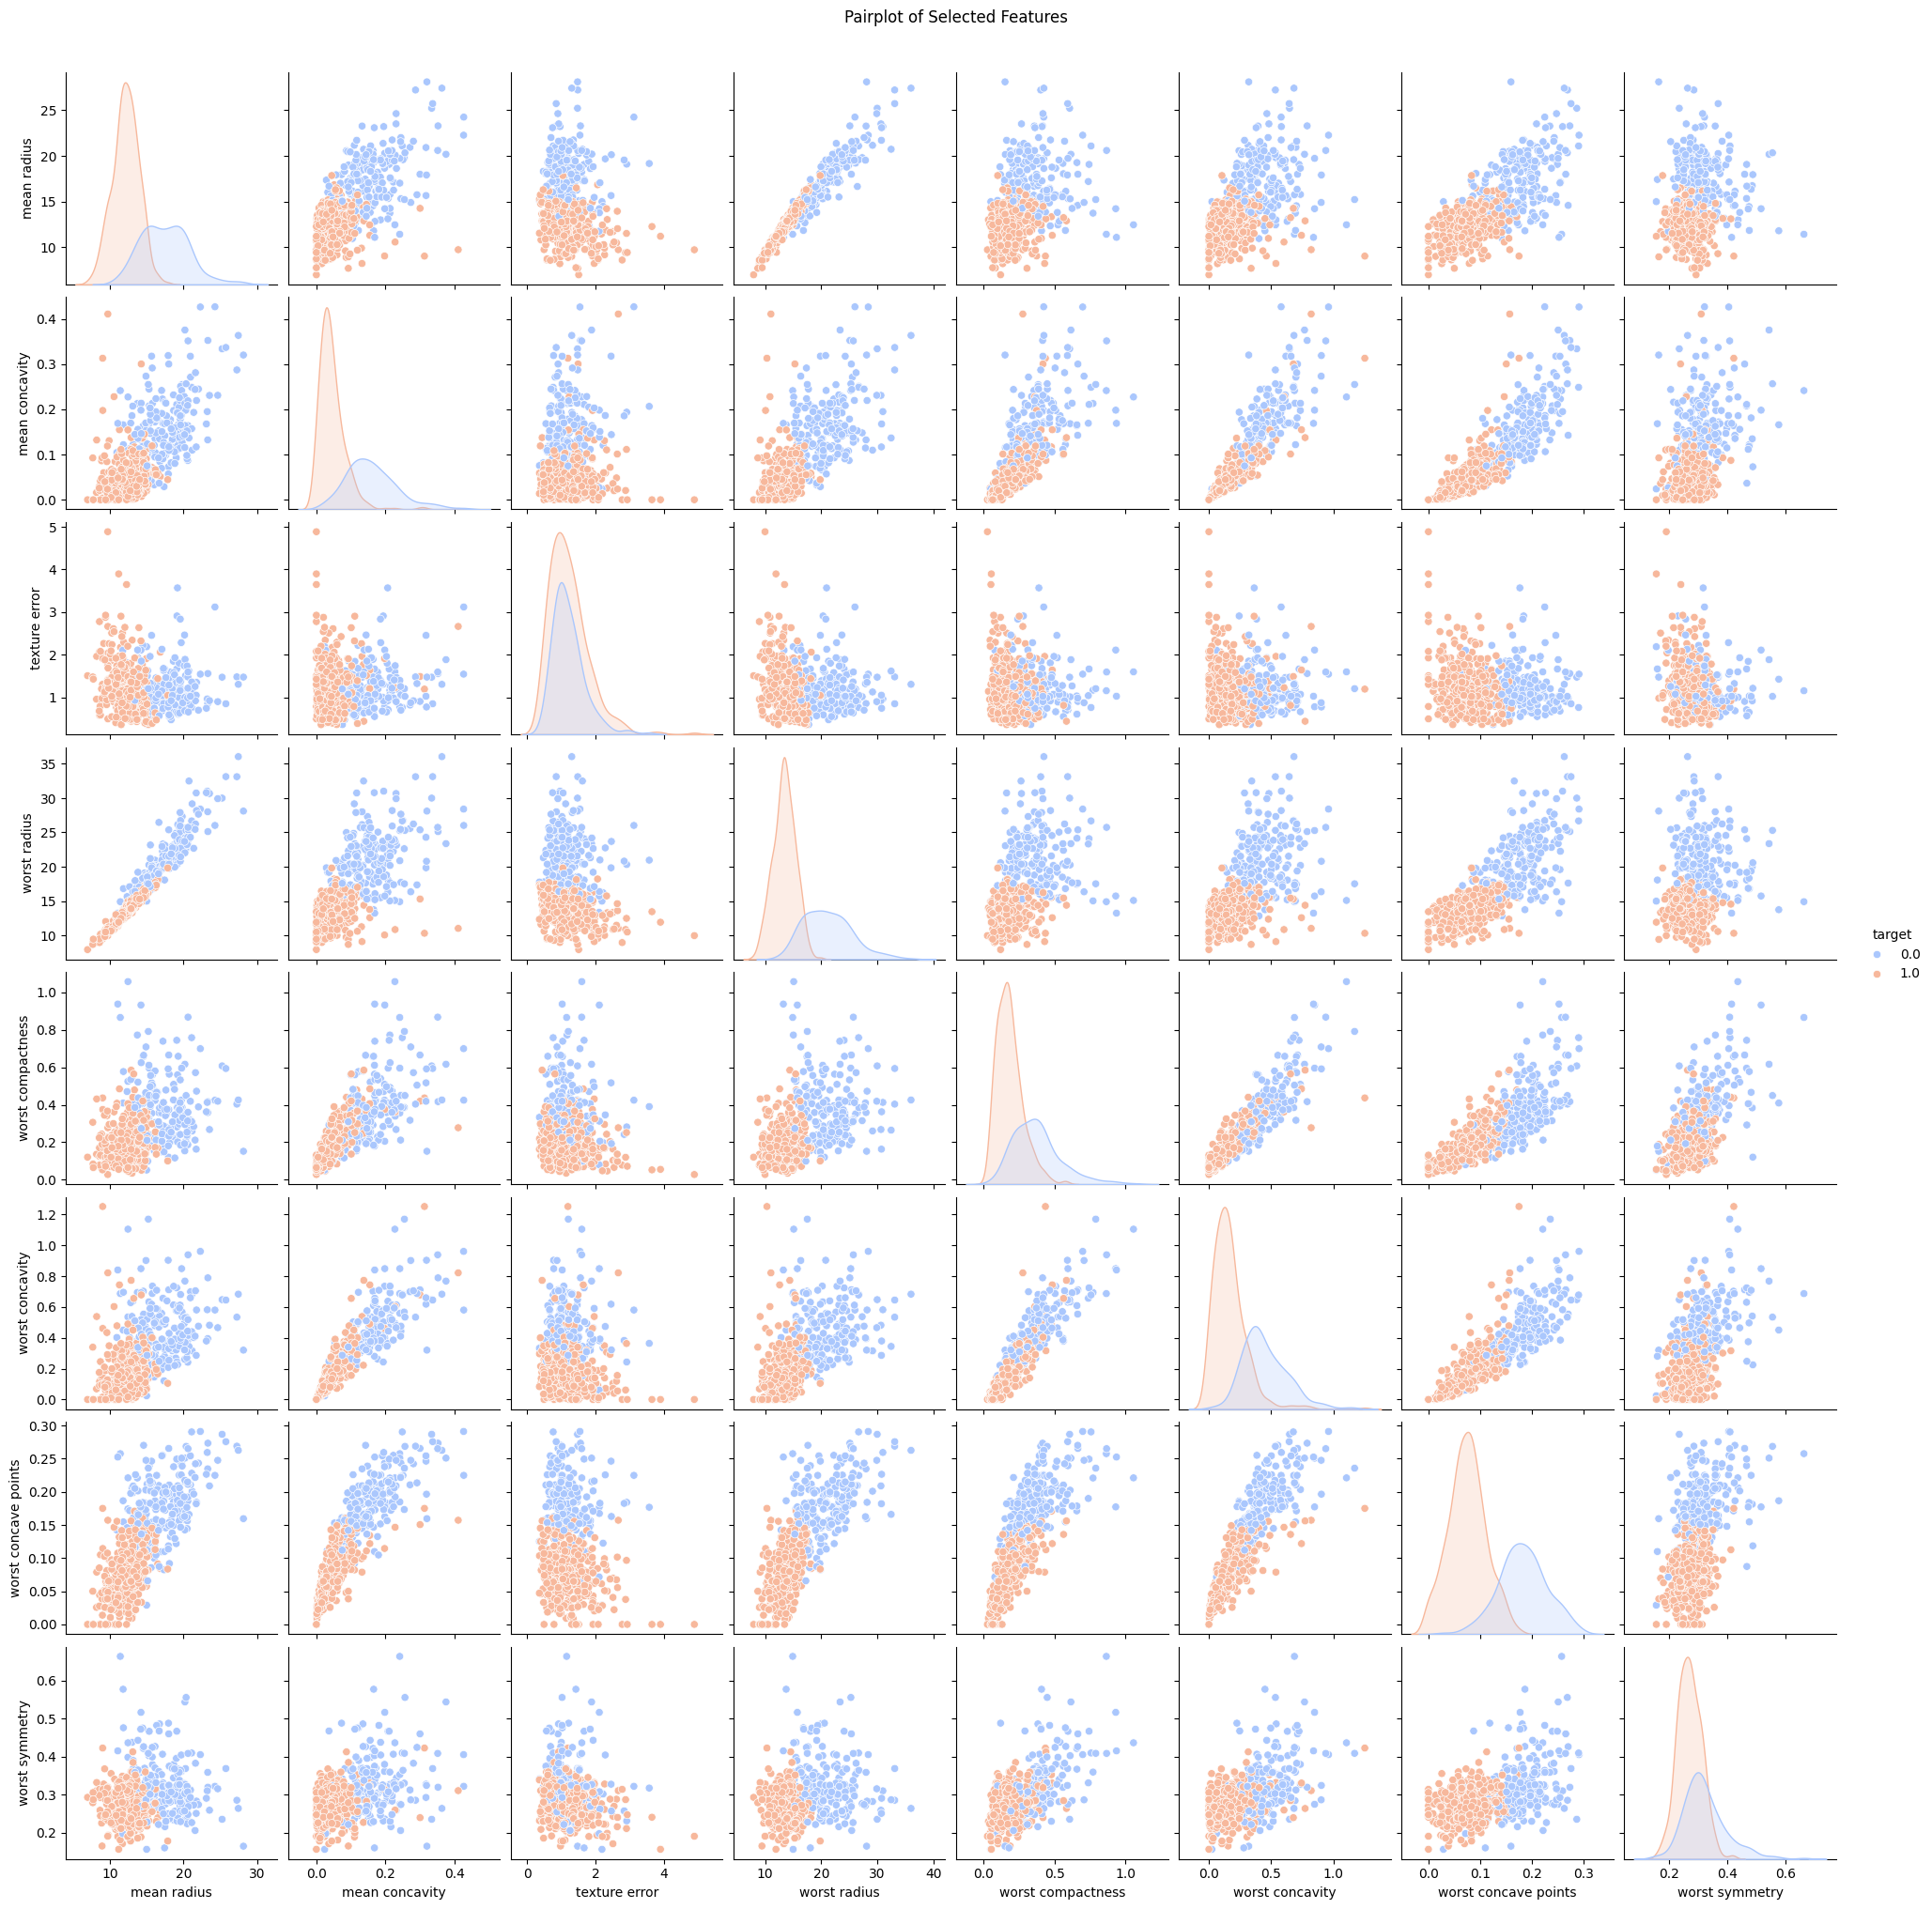

In [22]:
# === Visualization ===
sns.pairplot(df_selected, hue='target', palette='coolwarm')
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()



C:\Users\mdimr\AppData\Local\Temp\ipykernel_3516\513006479.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='coolwarm')


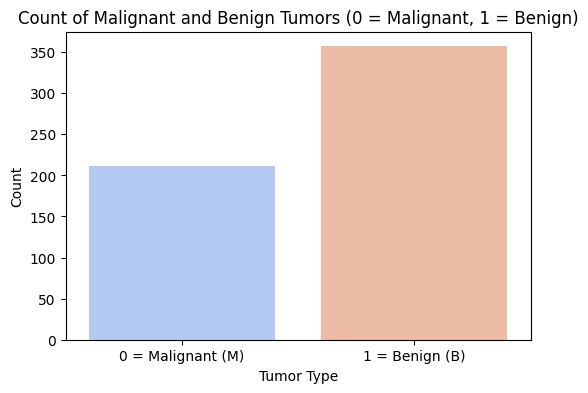

In [23]:
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df, palette='coolwarm')
plt.title("Count of Malignant and Benign Tumors (0 = Malignant, 1 = Benign)")
plt.xticks([0, 1], ['0 = Malignant (M)', '1 = Benign (B)'])
plt.xlabel('Tumor Type')
plt.ylabel('Count')
plt.show()



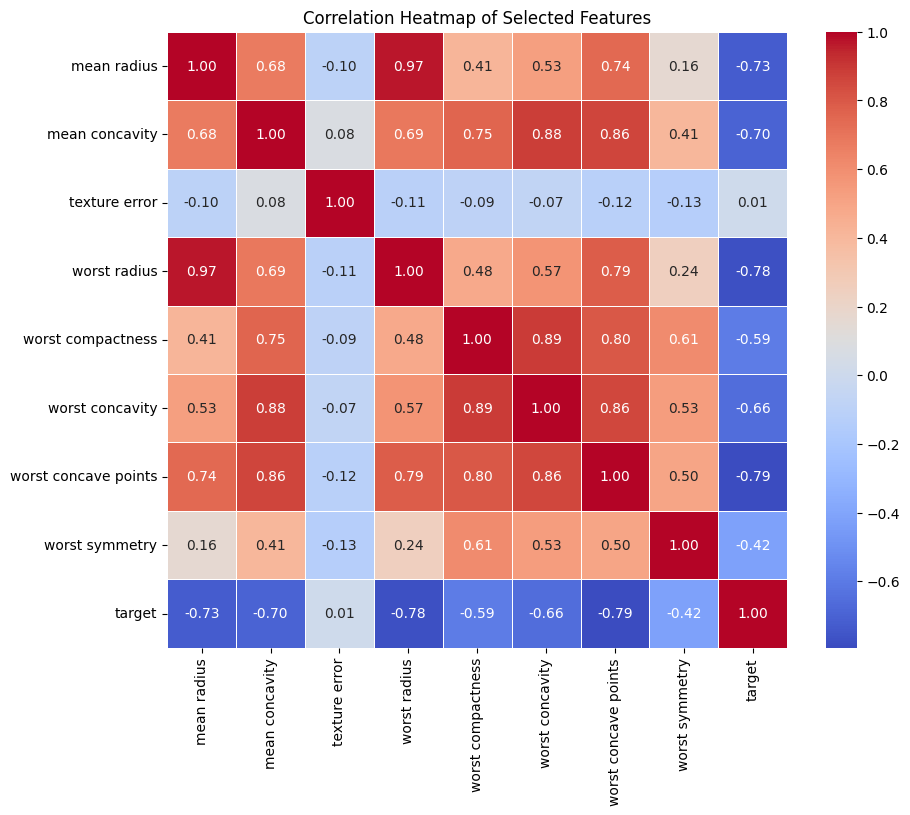

In [24]:
correlation_matrix = df_selected.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap of Selected Features")
plt.show()

In [25]:

# === Train-Test Split ===
X = df_selected[selected_features]
y = df_selected['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [26]:
# === Feature Scaling ===
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [27]:
# === Model Training and Evaluation ===
models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "SVM": SVC(probability=True, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "KNN": KNeighborsClassifier()
}

accuracy_scores = {}
classification_reports = {}
confusion_matrices = {}

for name, model in models.items():
    print(f"=== {name} ===")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[name] = accuracy * 100
    report = classification_report(y_test, y_pred)
    matrix = confusion_matrix(y_test, y_pred)
    classification_reports[name] = report
    confusion_matrices[name] = matrix
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print("\nClassification Report:")
    print(report)
    print("\nConfusion Matrix:")
    print(matrix)
    print("\n")


=== Logistic Regression ===
Accuracy: 97.37%

Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.95      0.96        43
         1.0       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


Confusion Matrix:
[[41  2]
 [ 1 70]]


=== SVM ===
Accuracy: 95.61%

Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.93      0.94        43
         1.0       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114


Confusion Matrix:
[[40  3]
 [ 2 69]]


=== Random Forest ===
Accuracy: 94.74%

Classification Report:
              precision    recall  f1-score   support

         0.0       0.95   

C:\Users\mdimr\AppData\Local\Temp\ipykernel_3516\3780515557.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(accuracy_scores.keys()), y=list(accuracy_scores.values()), palette="viridis")


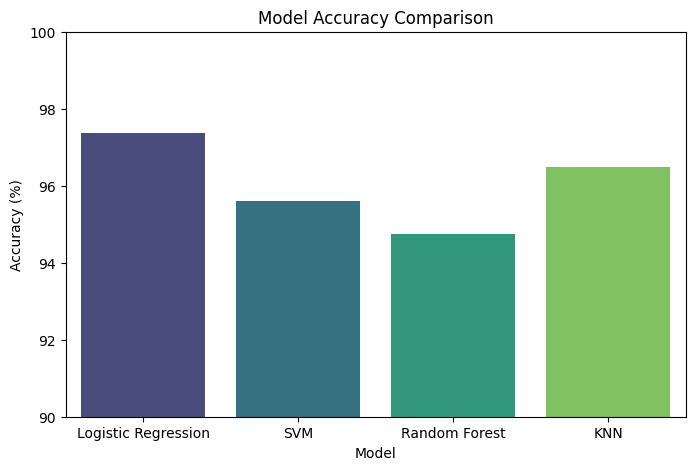

In [28]:
# === Visualize Model Performance ===
plt.figure(figsize=(8, 5))
sns.barplot(x=list(accuracy_scores.keys()), y=list(accuracy_scores.values()), palette="viridis")
plt.title("Model Accuracy Comparison")
plt.xlabel("Model")
plt.ylabel("Accuracy (%)")
plt.ylim(90, 100)
plt.show()

In [29]:

# === Determine the Best Model ===
best_model_name = max(accuracy_scores, key=accuracy_scores.get)
best_model = models[best_model_name]
print(f"\nThe best-performing model is {best_model_name} with an accuracy of {accuracy_scores[best_model_name]:.2f}%.")


The best-performing model is Logistic Regression with an accuracy of 97.37%.


In [30]:
# === Prediction on New Data ===
print("\nEnter the following values for prediction (selected features only):")
user_input = []
for feature in selected_features:
    while True:
        try:
            value = float(input(f"Enter value for {feature}: "))
            user_input.append(value)
            break
        except ValueError:
            print("Invalid input. Please enter a numerical value.")

user_input = np.array(user_input).reshape(1, -1)
user_input_scaled = scaler.transform(user_input)

prediction = best_model.predict(user_input_scaled)
prediction_prob = best_model.predict_proba(user_input_scaled)

if prediction[0] == 0:
    print("\nPrediction: The tumor is Malignant (cancerous).")
else:
    print("\nPrediction: The tumor is Benign (non-cancerous).")

# Convert prediction[0] to an integer
prediction_class = int(prediction[0])
print(f"Confidence of prediction: {prediction_prob[0][prediction_class] * 100:.2f}%")



Enter the following values for prediction (selected features only):

Prediction: The tumor is Malignant (cancerous).
Confidence of prediction: 100.00%


c:\Users\mdimr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
